In [117]:
from scipy.optimize import root
from scipy.integrate import odeint
from scipy import *
import matplotlib.pyplot as plt

In [150]:
### Four state serca model class
class serca:
    
    ## Must be in same order as dXdt return
    label = ['x0', 'x1', 'x2', 'y0', 'y1', 'y2', 'ca_e']
    nVar = len(label)
    
    vol_er = (3.9*0.1*0.1) # all units in um
    vol_cyt = (4.0*0.5*0.5-vol_er)
    vol_tot = vol_cyt + vol_er
    Pt=15e-6
    gamma=vol_er/vol_cyt
    c=100e-9
    
    cai = 100.0e-9
    cae = 0
    nserca = 8678.0
    N_avo=6.022e23
    initial = array([1,0,0,0,0,0,1])
    #initial = initial*nserca/(vol_er/1e18)/N_avo
    initial[6] = cae
    f=1.0
    
    
    #eq_value=[Pt/4,Pt/4,gamma*Pt/4,gamma*Pt/4,250e-6]
    
    ## Parameters
    p_orig = {
    'kx0_x1':2*1.0e8,
    'kx1_x2':1.0e8,
    'kx1_x0':83.666,
    'kx2_x1':2*83.666,
    'kx2_y2':0.6,
    'ky2_x2':4.118,
    'ky2_y1':2*30.015,
    'ky1_y0':30.015,
    'ky1_y2':1.0e5,
    'ky0_y1':2e5, #2e5
    'ky0_x0':0.4,
    'kx0_y0':1.20e-3
    }
    p=p_orig
    
    ## Get initial values for the system
    def __init__(self, X0=initial, T=arange(0.0, 1e-2, 1e-5)):
        self.T = T
        self.name = self.__class__.__name__
        if self.nVar != len(X0):
            print 'ERROR:', self.nVar, 'initial values required for:', self.name
        else: 
            self.X0 = X0
            
    
    def dXdt(self,X,t):
        x0, x1, x2, y0, y1, y2, ca_e = X 
        
        for var in self.p.keys():
            exec(var+'='+str(self.p[var]))
            
        dx0 = x0*(-kx0_x1*self.cai-kx0_y0)+x1*kx1_x0+y0*ky0_x0
        dx1 = x1*(-kx1_x2*self.cai-kx1_x0)+x0*self.cai*kx0_x1+x2*kx2_x1
        dx2 = x2*(-kx2_y2-kx2_x1)+x1*self.cai*kx1_x2+y2*ky2_x2
        dy0 = y0*(-ky0_y1*ca_e-ky0_x0)+y1*ky1_y0+x0*kx0_y0
        dy1 = y1*(-ky1_y2*ca_e-ky1_y0)+y0*ca_e*ky0_y1+y2*ky2_y1
        dy2 = y2*(-ky2_x2-ky2_y1)+y1*ca_e*ky1_y2+x2*kx2_y2
        dcae = -ca_e*(y1*ky1_y2 + y0*ky0_y1) + (y1*ky1_y0 + y2*ky2_y1)
        return [dx0, dx1, dx2, dy0, dy1, dy2, dcae]
    
    def update_p(self):
        for k in ['kx1_x2']:
            self.p[k]=self.f*self.p_orig[k]
            #print self.p
    
    def func_tbs(self,f,value):
        if type(f)==ndarray:
            g=f[0]
        else:
            g=f
        self.f=g
        #print type(self.f)
        self.update_p()
        X=odeint(self.dXdt,self.initial,t=arange(0.0, 100, 1e-1))
        return X[-1][6]-value

In [151]:
S=serca()

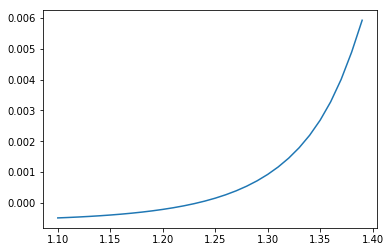

In [152]:
f=arange(1.1,1.4,0.01)
tbs=[S.func_tbs(fi,7.5e-4) for fi in f]

plt.plot(f,tbs)
plt.show()

In [102]:
sol=root(S.func_tbs,2,args=(7.5e-4,),method='hybr',tol=1e-6)
print sol

<type 'numpy.int64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
    fjac: array([[1.]])
     fun: -0.00075
 message: 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.'
    nfev: 13
     qtf: array([-0.00075])
       r: array([0.])
  status: 5
 success: False
       x: array([2.])


<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'nump

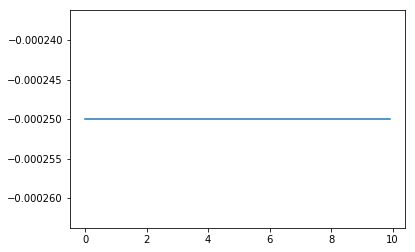

In [101]:
f=arange(0,10,0.1)
Eq_cae=[S.func_tbs(fs,2.5e-4) for fs in f]
plt.plot(f,Eq_cae)

In [16]:
sol['x']

array(111.1)

In [43]:
def func(x,a):
    return a*(x-1)**2

sol=root(func,1.1,args=(1,),method='hybr',tol=1e-3)

In [44]:
sol

    fjac: array([[-1.]])
     fun: array([1.97215226e-31])
 message: 'The solution converged.'
    nfev: 70
     qtf: array([-7.88860905e-31])
       r: array([-2.07450133e-15])
  status: 1
 success: True
       x: array([1.])

In [84]:
a=0.1
type(a)==float

True